In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene

In [4]:
def generate(disease_feature, diseases, features):
   
    """Function that from a list of relationships disease-feature obtains the
    feature matrix, so that rows are diseases and columns are features.
    """
   
   
    dis_feat_dict = { i : list() for i in diseases}
   
    disease_feature_array = disease_feature.to_numpy()
   
    for [disease, feature] in disease_feature_array:
       
        if not feature in dis_feat_dict[disease]:
            dis_feat_dict[disease].append(feature)
           
    bool_matr = [[0 for x in range(len(features))] for y in range(len(diseases))]
   
    count_dis = 0   
    for dis in diseases:       
        count_feat = 0       
        for feat in features:           
            if feat in dis_feat_dict[dis]:               
                bool_matr[count_dis][count_feat] = 1               
            count_feat += 1           
        count_dis += 1
   
    feature_matrix = pd.DataFrame(bool_matr)
    return feature_matrix
#------------------------------------------------------------------------------

# DATA

In [2]:
sint = pd.read_csv('sint_all.tsv', sep='\t')
sint = sint.drop(["Unnamed: 0"],axis=1)

In [3]:
len(sint["disease_id"].unique())

7582

In [4]:
len(sint["symptom"].unique())

1951

In [5]:
### DISNET

In [6]:
disnet_sint = sint

In [7]:
dis_feu_disnet = disnet_sint

In [8]:
dis_disnet = disnet_sint["disease_id"]
dis_disnet = dis_disnet.drop_duplicates()
dis_disnet = dis_disnet.tolist()

In [9]:
feu_disnet = disnet_sint["symptom"]
feu_disnet = feu_disnet.drop_duplicates()
feu_disnet = feu_disnet.tolist()

In [10]:
syn_disnet=generate(dis_feu_disnet,dis_disnet,feu_disnet)

In [11]:
syn_disnet.columns = feu_disnet
syn_disnet.index = dis_disnet

In [12]:
syn_disnet=np.array(syn_disnet)

In [ ]:
matrix_jaccard = pairwise_distances(syn_disnet, metric='jaccard')
matrix_jaccard = pd.DataFrame(matrix_jaccard)

In [14]:
matrix_jaccard.columns = dis_disnet
matrix_jaccard.index = dis_disnet

In [15]:
my_array = np.array(matrix_jaccard)[np.triu_indices(len(matrix_jaccard), k = 1)]
len(my_array)

28739571

In [16]:
my_array_simi = 1 - my_array

In [17]:
my_array_simi.mean()

0.054346292990571546

In [ ]:
#### PATHWAYS

In [55]:
triplets_total = pd.read_excel('triples_drebiop_final_dos.xlsx',engine='openpyxl')
triplets_total = triplets_total.drop(columns=['Unnamed: 0'])
triplets_total = triplets_total.drop_duplicates()

In [57]:
triplets_total = triplets_total.rename(columns={"disease_id": "disease_PwB","Original Condition CUI":"disease_no_PwB"})

In [58]:
def value_jaccard(disease1, disease2):
    result = matrix_jaccard.loc[disease1,disease2]
    return result

In [59]:
df_jaccard_distance = []
disease1_list = triplets_total["disease_PwB"].to_list()
disease2_list = triplets_total["disease_no_PwB"].to_list()

for disease1,disease2 in zip(disease1_list,disease2_list):
    print(disease1,disease2)
    try:
        value = value_jaccard(disease1,disease2)
        df_jaccard_distance.append(value)  
    except:
        print("No se puede calcular")
        df_jaccard_distance.append("Na")
    
    
    

C0035579 C0020598
C0035579 C0035086
C0035579 C0020598
C0035579 C0020626
C0035579 C0029456
C0035579 C0029458
C0035579 C0020598
C0035579 C0020626
C0035579 C0029456
C0035579 C0029458
C0035579 C0020598
C0035579 C0020626
C0020538 C0003962
C0020538 C0013604
C0020538 C0020428
C0020538 C0011881
C0020538 C0011881
C0020538 C0011881
C0020538 C0018802
C0020538 C0018802
C0030567 C0015371
C0030567 C0020649
C0030567 C0242422
C0030567 C0242422
C0030567 C0242422
C0030567 C0600177
No se puede calcular
C0020538 C0038454
C0020538 C0038454
C0020538 C0027051
C0020538 C1739363
C0035579 C0085682
C0035579 C0042870
C0035579 C0042870
C0035579 C3536984
C0035579 C0039621
No se puede calcular
C0035579 C0085682
C0002892 C0042847
C0002892 C0042847
C0002892 C0162316
C0020538 C0009905
No se puede calcular
C0020538 C0029151
No se puede calcular
C0919267 C0001144
C0919267 C0702166
C0919267 C0718217
No se puede calcular
C1140680 C0001144
C1140680 C0702166
C1140680 C0718217
No se puede calcular


In [60]:
triplets_total["Jaccard_distance"] = df_jaccard_distance

In [61]:
final_jacc_triples = triplets_total[triplets_total["Jaccard_distance"]!= "Na"]

In [ ]:
final_jacc_triples["Jaccard_similarity"] = 1-final_jacc_triples["Jaccard_distance"]

In [64]:
final_jacc_triples["Jaccard_similarity"].mean()

0.22111618034064676

<AxesSubplot:>

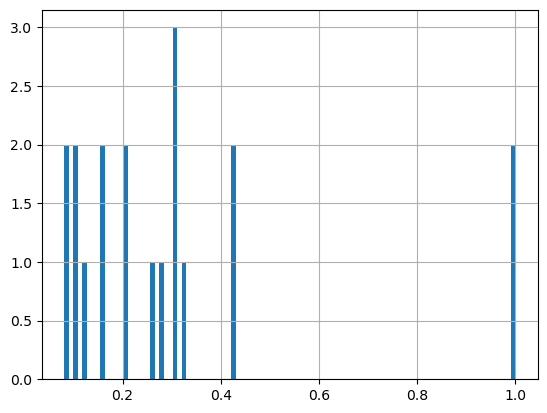

In [32]:
final_jacc_triples["Jaccard_similarity"].hist(bins=100)

In [ ]:
#### TARGET

In [35]:
Triples_target_final = pd.read_excel("triples_final_drege_repo_csbj.xlsx",engine='openpyxl')
Triples_target_final = Triples_target_final.drop(columns=['Unnamed: 0'])
Triples_target_final = Triples_target_final.drop_duplicates()

In [38]:
df_jaccard_distance_target = []
disease1_list = Triples_target_final["disease_id"].to_list()
disease2_list = Triples_target_final["New Condition CUI"].to_list()

for disease1,disease2 in zip(disease1_list,disease2_list):
    print(disease1,disease2)
    try:
        value = value_jaccard(disease1,disease2)
        df_jaccard_distance_target.append(value)  
    except:
        print("No se puede calcular")
        df_jaccard_distance_target.append("Na")
    

C0041696 C0270549
C1269683 C0270549
C0041696 C0028754
C1269683 C0028754
C0011570 C0028754
C0011581 C0028754
C0344315 C0028754
No se puede calcular
C0041696 C0520676
C1269683 C0520676
C0011570 C0520676
C0011581 C0520676
C0344315 C0520676
No se puede calcular
C1269683 C0016053
C1269683 C0016053
C0011570 C0016053
C0011570 C0016053
C0011581 C0016053
C0011581 C0016053
C0344315 C0016053
No se puede calcular
C0344315 C0016053
No se puede calcular
C0029408 C0032580
C0003873 C0032580
C0029408 C0007102
C0003873 C0007102
C0029408 C0346629
C0003873 C0346629
C0029408 C0699790
No se puede calcular
C0003873 C0699790
No se puede calcular
C0029408 C0009402
C0003873 C0009402
C0029408 C0242379
C0003873 C0242379
C0029408 C0684249
C0003873 C0684249
C0029408 C1306460
No se puede calcular
C0003873 C1306460
No se puede calcular
C0029408 C0006142
C0003873 C0006142
C0029408 C0678222
C0003873 C0678222
C0003873 C0004096
C0010346 C0003864
C0010346 C0002395
C1960398 C0278488
No se puede calcular
C1960398 C0024623
N

In [39]:
Triples_target_final["Jaccard_distance"] = df_jaccard_distance_target

In [40]:
final_jacc_triples_tar = Triples_target_final[Triples_target_final["Jaccard_distance"]!= "Na"]

In [ ]:
final_jacc_triples_tar["Jaccard_similarity"] = 1-final_jacc_triples_tar["Jaccard_distance"]

In [42]:
final_jacc_triples_tar["Jaccard_similarity"].mean()

0.1706008356068068

<AxesSubplot:>

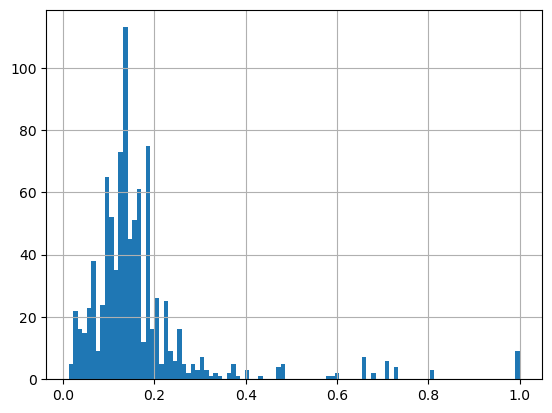

In [44]:
final_jacc_triples_tar["Jaccard_similarity"].hist(bins=100)

### DISNET SIMILARITY

In [45]:
df_simi_disnet = pd.DataFrame(my_array_simi)

In [46]:
df_simi_disnet["score"] = df_simi_disnet

# STATISTICS

In [65]:
drebiop = final_jacc_triples["Jaccard_similarity"].tolist()

In [48]:
drege = final_jacc_triples_tar["Jaccard_similarity"].tolist()

In [49]:
disnet = df_simi_disnet["score"].tolist()

In [66]:
drebiop = np.array(drebiop)

In [51]:
drege = np.array(drege)

In [52]:
disnet = np.array(disnet)

In [67]:
stats.mannwhitneyu(drebiop,drege)

MannwhitneyuResult(statistic=22189.0, pvalue=0.05921647904233011)

In [68]:
stats.mannwhitneyu(drebiop,disnet)

MannwhitneyuResult(statistic=1089001604.0, pvalue=4.9458338586431055e-21)